<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/research_loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Binary Cross Entropy
The Binary Cross entropy will calculate the cross-entropy loss between the predicted classes and the true classes. By default, the sum_over_batch_size reduction is used. This means that the loss will return the average of the per-sample losses in the batch.

In [3]:
y_true = [[0., 1.], [0.2, 0.8],[0.3, 0.7],[0.4, 0.6]]
y_pred = [[0.6, 0.4], [0.4, 0.6],[0.6, 0.4],[0.8, 0.2]]
bce = tf.keras.losses.BinaryCrossentropy(reduction='sum_over_batch_size')
bce(y_true, y_pred).numpy()

0.839445

The sum reduction means that the loss function will return the sum of the per-sample losses in the batch.

In [4]:
bce = tf.keras.losses.BinaryCrossentropy(reduction='sum')
bce(y_true, y_pred).numpy()

3.35778

Using the reduction as none returns the full array of the per-sample losses.

In [5]:
bce = tf.keras.losses.BinaryCrossentropy(reduction='none')
bce(y_true, y_pred).numpy()

array([0.9162905 , 0.5919184 , 0.79465103, 1.0549198 ], dtype=float32)

# Categorical Crossentropy
The CategoricalCrossentropy also computes the cross-entropy loss between the true classes and predicted classes. The labels are given in an one_hot format.

In [6]:
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

0.83944523

# Sparse Categorical Crossentropy
If you have two or more classes and  the labels are integers, the SparseCategoricalCrossentropy should be used.

In [7]:
y_true = [0, 1,2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1],[0.1, 0.8, 0.1]]
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_true, y_pred).numpy()

1.840487

# The Poison Loss
You can also use the Poisson class to compute the poison loss. It’s a great choice if your dataset comes from a Poisson distribution for example the number of calls a call center receives per hour.

In [8]:
y_true = [[0.1, 1.,0.8], [0.1, 0.9,0.1],[0.2, 0.7,0.1],[0.3, 0.1,0.6]]
y_pred = [[0.6, 0.2,0.2], [0.2, 0.6,0.2],[0.7, 0.1,0.2],[0.8, 0.1,0.1]]
p = tf.keras.losses.Poisson()
p(y_true, y_pred).numpy()

0.9377117

# Kullback-Leibler Divergence Loss
The relative entropy can be computed using the KLDivergence class. According to the official docs at PyTorch:

KL divergence is a useful distance measure for continuous distributions and is often useful when performing direct regression over the space of (discretely sampled) continuous output distributions.

In [9]:
y_true = [[0.1, 1.,0.8], [0.1, 0.9,0.1],[0.2, 0.7,0.1],[0.3, 0.1,0.6]]
y_pred = [[0.6, 0.2,0.2], [0.2, 0.6,0.2],[0.7, 0.1,0.2],[0.8, 0.1,0.1]]
kl = tf.keras.losses.KLDivergence()
kl(y_true, y_pred).numpy()

1.1471658

## Object Detection
# The Focal Loss
In classification problems involving imbalanced data and object detection problems, you can use the Focal Loss. The loss introduces an adjustment to the cross-entropy criterion.


It is done by altering its shape in a way that the loss allocated to well-classified examples is down-weighted. This ensures that the model is able to learn equally from minority and majority classes.

0_8fyhgPJALUUKHKrr.png

The cross-entropy loss is scaled by scaling the factors decaying at zero as the confidence in the correct class increases. The factor of scaling down weights the contribution of unchallenging samples at training time and focuses on the challenging ones.

In [ ]:
import tensorflow.addons as tfa

y_true = [[0.97], [0.91], [0.03]]
y_pred = [[1.0], [1.0], [0.0]]
sfc = tfa.losses.SigmoidFocalCrossEntropy()
sfc(y_true, y_pred).numpy()
array([0.00010971, 0.00329749, 0.00030611], dtype=float32)

# Regression
In regression problems, you have to calculate the differences between the predicted values and the true values but as always there are many ways to do it.

# Mean Sqre Error
The MeanSquaredError class can be used to compute the mean square of errors between the predictions and the true values.

In [12]:
y_true = [12, 20, 29., 60.]
y_pred = [14., 18., 27., 55.]
mse = tf.keras.losses.MeanSquaredError()
mse(y_true, y_pred).numpy()

9.25

Mean Absolute Percentage Error
The mean absolute percentage error is computed using the function below.

gif.gif

It is calculated as shown below.

Consider using this loss when you want a loss that you can explain intuitively. People understand percentages easily. The loss is also robust to outliers.

In [13]:
y_true = [12, 20, 29., 60.]
y_pred = [14., 18., 27., 55.]
mape = tf.keras.losses.MeanAbsolutePercentageError()
mape(y_true, y_pred).numpy()

10.474138

# Cosine Similarity Loss
If your interest is in computing the cosine similarity between the true and predicted values, you’d use the CosineSimilarity class. It is computed as:


The result is a number between  -1 and 1 . 0 indicates orthogonality while values close to -1 show that there is great similarity.

In [14]:
y_true = [[12, 20], [29., 60.]]
y_pred = [[14., 18.], [27., 55.]]
cosine_loss = tf.keras.losses.CosineSimilarity(axis=1)
cosine_loss(y_true, y_pred).numpy()

-0.9963575

## Learning Embeddings
# Triplet Loss
You can also compute the triplet loss with semi-hard negative mining via TensorFlow addons. The loss encourages the positive distances between pairs of embeddings with the same labels to be less than the minimum negative distance.

In [ ]:
import tensorflow_addons as tfa

model.compile(optimizer='adam',
              loss=tfa.losses.TripletSemiHardLoss(),
              metrics=['accuracy'])

### Creating custom loss functions in Keras
Sometimes there is no good loss available or you need to implement some modifications. Let’s learn how to do that.

A custom loss function can be created by defining a function that takes the true values and predicted values as required parameters. The function should return an array of losses. The function can then be passed at the compile stage.

Let’s see how we can apply this custom loss function to an array of predicted and true values.

In [29]:
def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

#model.compile(optimizer='adam', loss=custom_loss_function)

In [26]:
squared_difference = tf.square(np.array(y_true)-np.array(y_pred))
print(squared_difference)

tf.Tensor([ 4.  4.  4. 25.], shape=(4,), dtype=float64)


In [30]:
import numpy as np

y_true = [12, 20, 29., 60.]
y_pred = [14., 18., 27., 55.]
cl = custom_loss_function(np.array(y_true),np.array(y_pred))
cl.numpy()

9.25

### Use of Keras loss weights
During the training process, one can weigh the loss function by observations or samples. The weights can be arbitrary, but a typical choice is class weights (distribution of labels). Each observation is weighted by the fraction of the class it belongs to (reversed) so that the loss for minority class observations is more important when calculating the loss.

One of the ways to do this is to pass the class weights during the training process.

The weights are passed using a dictionary that contains the weight for each class. You can compute the weights using Scikit-learn or calculate the weights based on your own criterion.

In [ ]:
weights = { 0:1.01300017,1:0.88994364,2:1.00704935, 3:0.97863318,4:1.02704553, 5:1.10680686,6:1.01385603,7:0.95770152, 8:1.02546573,
               9:1.00857287}
model.fit(x_train, y_train,verbose=1, epochs=10,class_weight=weights)

The second way is to pass these weights at the compile stage.

In [ ]:
weights = [1.013, 0.889, 1.007, 0.978, 1.027,1.106,1.013,0.957,1.025, 1.008]

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              loss_weights=weights,
              metrics=['accuracy'])

### How to monitor Keras loss function [example]
It is usually a good idea to monitor the loss function on the training and validation set as the model is training. Looking at those learning curves is a good indication of overfitting or other problems with model training.

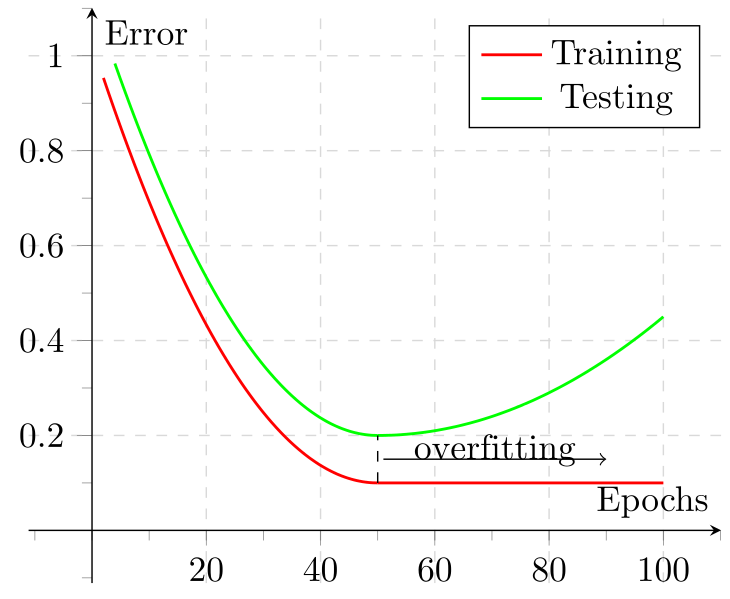

There are two main options of how this can be done.

##Monitor Keras loss using console logs
The quickest and easiest way to log and look at the losses is simply printing them to the console

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
   tf.keras.layers.Flatten(input_shape=(28, 28)),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train,verbose=1, epochs=10)

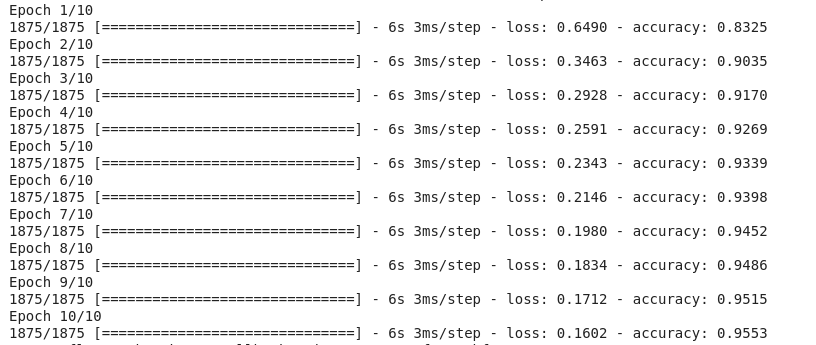

The problem with this approach is that those logs can be easily lost, it is difficult to see progress, and when working on remote machines, you may not have access to it.

###Monitor Keras loss using a callback
Another cleaner option is to use a callback that will log the loss somewhere on every batch and epoch ended.

You need to decide where and what you would like to log, but it is really simple.

For example, logging Keras loss to neptune.ai could look like this:

In [ ]:
from keras.callbacks import Callback

class NeptuneCallback(Callback):
    def on_batch_end(self, batch, logs=None):
        for metric_name, metric_value in logs.items():
            neptune_run[f"{metric_name}"].append(metric_value)

    def on_epoch_end(self, epoch, logs=None):
        for metric_name, metric_value in logs.items():
            neptune_run[f"{metric_name}"].append(metric_value)

You can create the monitoring callback yourself or use one of the many available Keras callbacks both in the Keras library and in other libraries that integrate with it, like neptune.ai, TensorBoard, and others.

Once you have the callback ready, you simply pass it to the model.fit(...):

In [ ]:
pip install neptune-tensorflow-keras

In [ ]:
# the same as above
import neptune
from neptune.integrations.tensorflow_keras import NeptuneCallback


run = neptune.init_run()

neptune_callback = NeptuneCallback(run=run)

model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    callbacks=[neptune_callback],
)

And monitor your experiment learning curves in the web app:

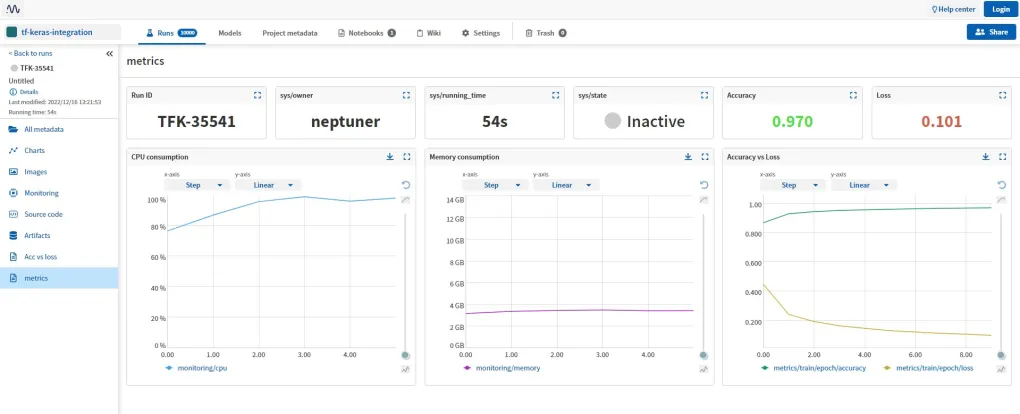



https://docs.neptune.ai/integrations/keras/

## Why Keras loss nan happens
Most of the time, losses you log will be just some regular values, but sometimes you might get nans when working with Keras loss functions.

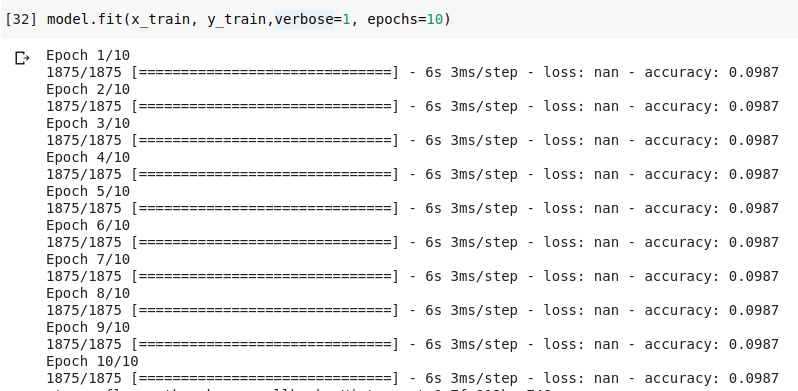

When that happens, your model will not update its weights and will stop learning, so this situation needs to be avoided.

There could be many reasons for nan loss but usually, what happens is:

#nans in the training set will lead to nans in the loss,
#NumPy infinite in the training set will also lead to nans in the loss,
#Using a training set that is not scaled,
#Use of very large l2 regularizers and a learning rate above 1,
#Use of the wrong optimizer function,
#Large (exploding) gradients that result in a large update to network weights during training.
So in order to avoid nans in the loss, ensure that:

#Check that your training data is properly scaled and doesn’t contain nans;
#Check that you are using the right optimizer and that your learning rate is not too large;
#Check whether the l2 regularization is not too large;
#If you are facing the exploding gradient problem, you can either: re-design the network or use gradient clipping so that your gradients have a certain “maximum allowed model update”